In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
type(cancer)

sklearn.utils.Bunch

In [4]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
# display the overiew of the data
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
# display the target information
target = cancer['target']
print(cancer['target_names'])
print(target)

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [7]:
# load the data to a data frame and name the columns as feature_names
names = cancer['feature_names']
df = pd.DataFrame(cancer['data'], columns=names)
print(names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [39]:
df.shape

(569, 30)

In [40]:
# check if there is null value 
np.where(df.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [11]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# dataset visualization
print(df.loc[8])

mean radius                 13.000000
mean texture                21.820000
mean perimeter              87.500000
mean area                  519.800000
mean smoothness              0.127300
mean compactness             0.193200
mean concavity               0.185900
mean concave points          0.093530
mean symmetry                0.235000
mean fractal dimension       0.073890
radius error                 0.306300
texture error                1.002000
perimeter error              2.406000
area error                  24.320000
smoothness error             0.005731
compactness error            0.035020
concavity error              0.035530
concave points error         0.012260
symmetry error               0.021430
fractal dimension error      0.003749
worst radius                15.490000
worst texture               30.730000
worst perimeter            106.200000
worst area                 739.300000
worst smoothness             0.170300
worst compactness            0.540100
worst concav

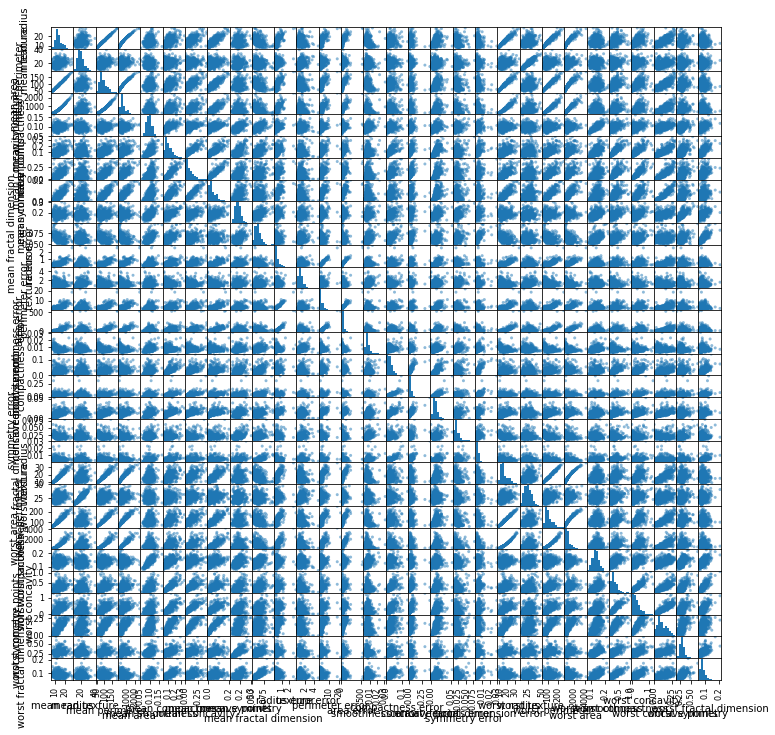

In [13]:
# display scatter plot matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(12,12))
plt.show()

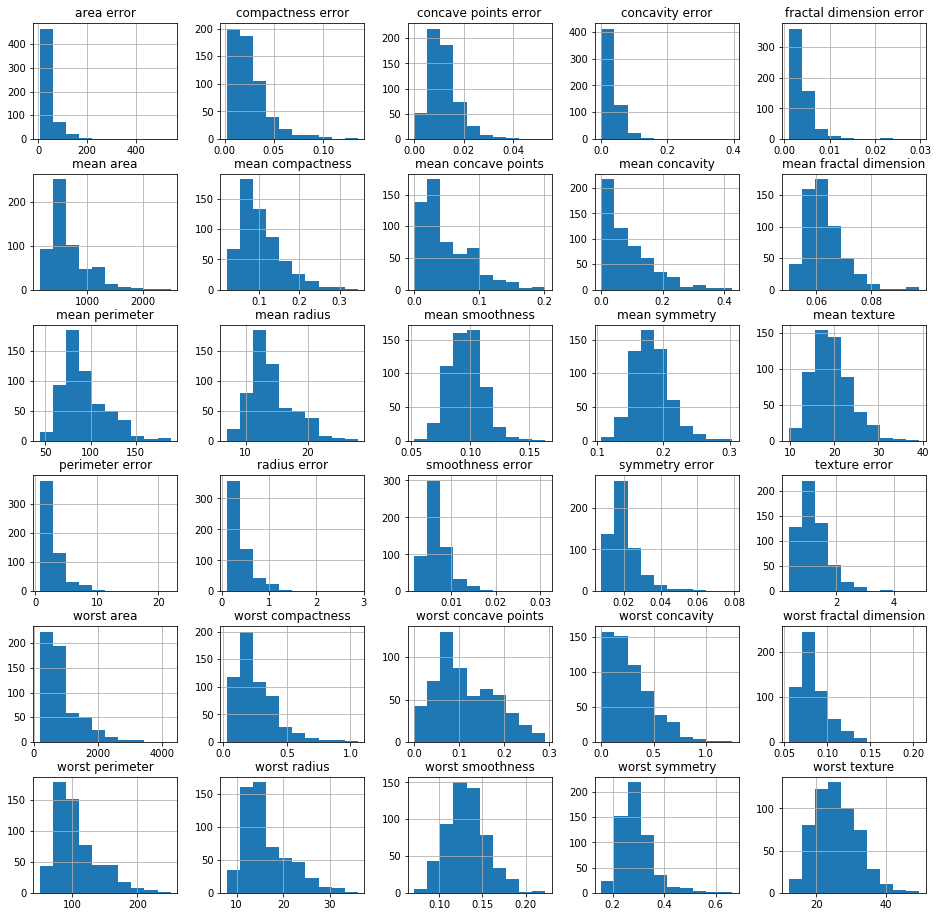

In [14]:
df.hist(figsize=(16,16))
plt.show()

## Visualize the data using Principal Component Analysis (PCA)

In [15]:
# scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
scaled_data = scaler.transform(df)
type(scaled_data)

numpy.ndarray

In [75]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(scaled_data)
# pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [76]:
x_pca = pca.transform(scaled_data)
type(x_pca)

numpy.ndarray

In [77]:
print(scaled_data.shape)
print(x_pca.shape)
print(pca.components_)

(569, 30)
(569, 2)
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [78]:
# how much information preserved
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.44272026 0.18971182]
0.6324320765155945


Text(0, 0.5, 'Second Principal Component')

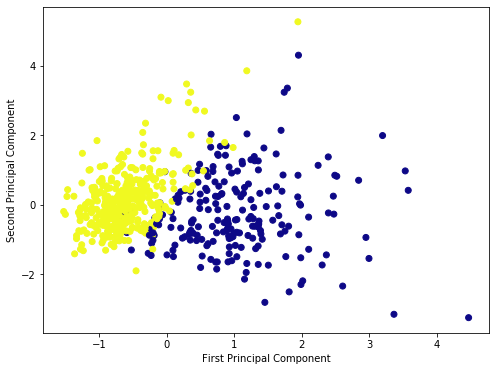

In [79]:
# display scatter plot matrix
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

## Using K-Means Cluster

In [80]:
# Apply Elbow method
from sklearn.cluster import KMeans

# init data list
X = []
Y = []

for i in range(1, 31):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_pca)
    
    X.append(i)
    
    awcss = kmeans.inertia_ / x_pca.shape[0]
    Y.append(awcss)

<function matplotlib.pyplot.show(*args, **kw)>

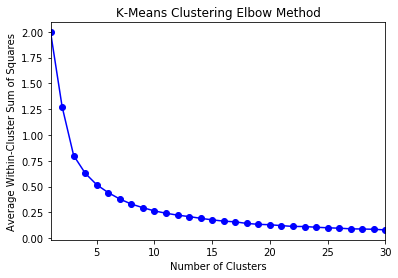

In [81]:
plt.plot(X,Y,'bo-')
plt.xlim(1,30)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Within-Cluster Sum of Squares')
plt.title('K-Means Clustering Elbow Method')
plt.show

In [82]:
# let's try to re-fit kmeans model and play around with the number of clusters
# according to the elbow method

kmeans = KMeans(n_clusters=2)
kmeans.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

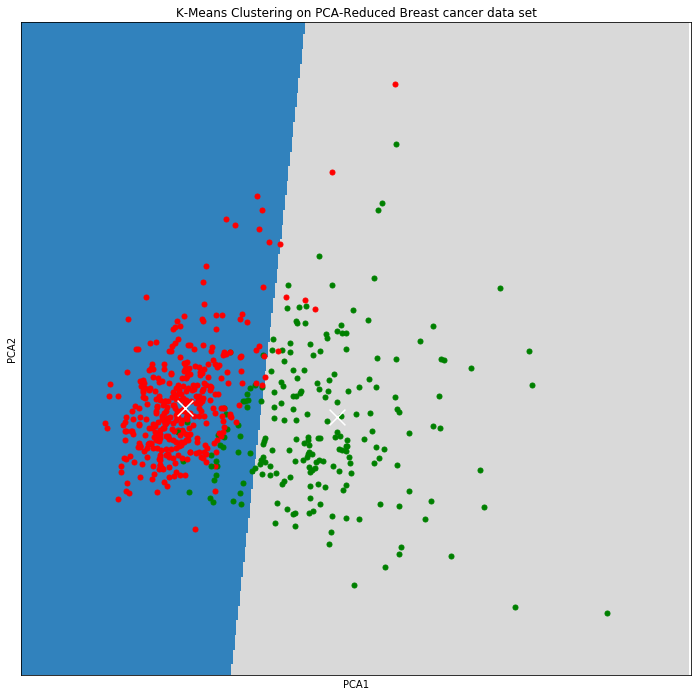

In [83]:
# set size for the mesh
h = 0.02

# generate mesh grid
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# generate color plot from the results
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,12))
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.tab20c, aspect='auto', origin='lower')

for i, point in enumerate(x_pca):
    if target[i] == 0:
        plt.plot(point[0], point[1], 'g.', markersize=10)
    if target[i] == 1:
        plt.plot(point[0], point[1], 'r.', markersize=10)
        
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=250, linewidths=4, color='w', zorder=10)

plt.title('K-Means Clustering on PCA-Reduced Breast cancer data set')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xticks(())
plt.yticks(())

plt.show()

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=101)
# X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.30, random_state=101)

In [87]:
from sklearn.svm import SVC
model = SVC(gamma='auto')

In [88]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
predictions = model.predict(X_test)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print('-----------------------------------------------------------')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.97      0.99      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

-----------------------------------------------------------
[[ 63   3]
 [  1 104]]


## Use Grid search to search best parameter for 'C' and 'gamma'

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [93]:
grid = GridSearchCV(model, param_grid, cv=3,verbose=3)

In [94]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.632, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.632, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.636, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.910, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.917, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.932, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=0.1, gamma=0.001, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.632, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.632, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.636, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.632, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.632, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.636, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [95]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [96]:
grid_predictions = grid.predict(X_test)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, grid_predictions))
print('------------------------------------------------------------')
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        66
           1       0.95      1.00      0.97       105

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

------------------------------------------------------------
[[ 60   6]
 [  0 105]]


In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [113]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [114]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [115]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        predicted_train = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, predicted_train)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, predicted_train)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, predicted_train)))
        
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    
    elif train==False:
        predicted_test = clf.predict(X_test)
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, predicted_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, predicted_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, predicted_test)))
        
        res = cross_val_predict(clf, X_test, y_test, cv=3)
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

In [116]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9523

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       146
           1       0.95      0.97      0.96       252

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398


Confusion Matrix: 
 [[134  12]
 [  7 245]]

Average Accuracy: 	 0.9374
Accuracy SD: 		 0.0253


In [117]:
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9240

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        66
           1       0.93      0.95      0.94       105

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171


Confusion Matrix: 
 [[ 58   8]
 [  5 100]]

Average Accuracy: 	 0.6667
Accuracy SD: 		 0.4714


## Use Grid search for KNN

In [118]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [119]:
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

In [131]:
knn_grid_serch = GridSearchCV(knn, params, n_jobs=1, cv=3, iid=True, verbose=1)

In [132]:
knn_grid_serch.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=True, n_jobs=1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [136]:
knn_grid_serch.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [138]:
knn_grid_serch.best_params_

{'n_neighbors': 4}

In [134]:
print_score(knn_grid_serch, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9523

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       146
           1       0.96      0.96      0.96       252

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398


Confusion Matrix: 
 [[137   9]
 [ 10 242]]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Average Accuracy: 	 0.9375
Accuracy SD: 		 0.0271


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished


In [135]:
print_score(knn_grid_serch, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9181

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        66
           1       0.93      0.94      0.93       105

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171


Confusion Matrix: 
 [[58  8]
 [ 6 99]]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Average Accuracy: 	 0.6550
Accuracy SD: 		 0.4754


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


## Random Forest Classifier

In [140]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,random_state=42)
rfc.fit(X_train, y_train)
print_score(knn_grid_serch, X_train, y_train, X_test, y_test, train=True)
print_score(knn_grid_serch, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9523

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       146
           1       0.96      0.96      0.96       252

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398


Confusion Matrix: 
 [[137   9]
 [ 10 242]]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Average Accuracy: 	 0.9375
Accuracy SD: 		 0.0271
Test Result:

accuracy score: 0.9181

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        66
           1       0.93      0.94      0.93       105

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171


Confusion Matrix: 
 [[58  8]
 [ 6 99]]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Average Accuracy: 	 0.6550
Accuracy SD: 		 0.4754


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
